In [2]:
import numpy as np; np.random.seed(1)
import pandas as pd
import json
import matplotlib.pyplot as plt


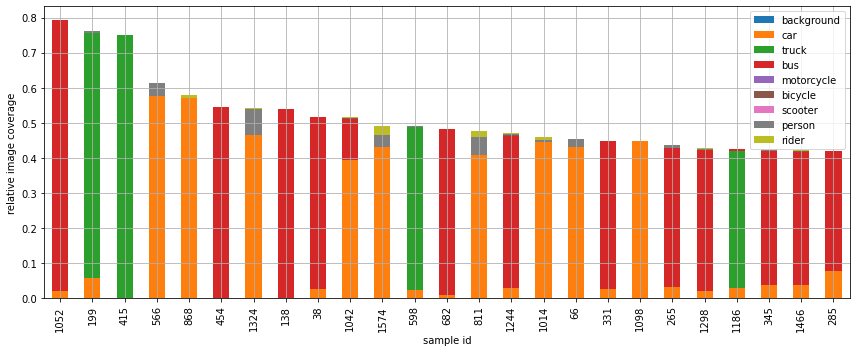

In [67]:
df = pd.read_json('bb_sizes.json')
df = df.sort_values('sum', ascending=False).drop(['sum'], axis=1)
ax = df[:25].plot(figsize=(12,5), kind='bar', stacked=True, grid=True)
ax.set_xlabel("sample id")
ax.set_ylabel("relative image coverage")
ax.legend(loc="upper right", ncol=1)
plt.tight_layout()
plt.savefig("top_25_bb_sizes.pdf")

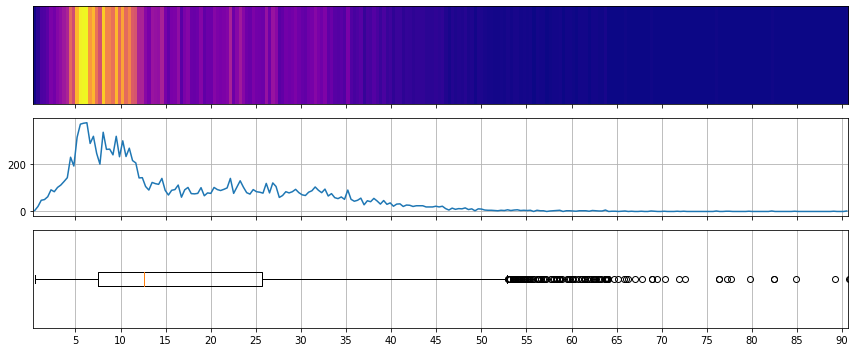

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np; np.random.seed(1)
plt.rcParams["figure.figsize"] = 5,2

aspect_ratios = []
with open('aspect_ratios.json') as f:
    aspect_ratios = json.load(f)
    
y, x = np.histogram(aspect_ratios, bins=250)
x = x[:-1]

#x = np.linspace(-3,3)
#y = np.cumsum(np.random.randn(50))+6

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(12, 5))
ax1.xaxis.set_major_locator(MultipleLocator(5))


extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax1.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax1.set_yticks([])
ax1.set_xlim(extent[0], extent[1])
ax1.xaxis.set_major_locator(MultipleLocator(5))

ax2.grid()
ax2.plot(x,y)

ax3.grid()
ax3.boxplot(aspect_ratios, vert=False)
ax3.set_yticks([])

plt.tight_layout()
plt.savefig('aspect_ratios.pdf')
plt.show()


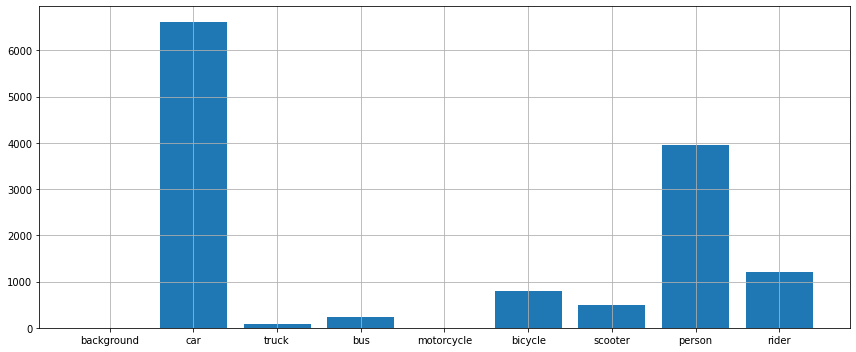

In [68]:
with open('total_class_occurrences.json') as f:
    data = json.load(f)
    
plt.figure(figsize=(12,5))
plt.bar(*zip(*data.items()))
plt.grid()
plt.tight_layout()
plt.savefig('total_class_occurrences.pdf')
plt.show()